# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$ 

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках. 

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [ ]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек 
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [ ]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


In [ ]:
from numpy import linalg as LA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
#train
def train_model(tg, gt):
  assert tg.ndim > 1 and gt.ndim > 1  and tg.ndim == gt.ndim
  w = np.dot(np.dot(LA.inv(np.dot(tg.reshape(1,-1), tg)), tg.reshape(1,-1)), gt)
  b = gt.mean() - w*tg.mean()
  return w, b

In [ ]:
#predict
def pred(data,w, b):
  return data * w + b
w,b = train_model(X_train,np.expand_dims(y_train,1))
pr = pred(X_test,w,b)

In [ ]:
def metric(pr,gt,name = "MSE"):
  pr = pr.reshape(-1)
  gt = gt.reshape(-1)
  if name == "MSE":
    return np.average(((pr - gt)**2),axis=0)
  if name == "MAE":
    return np.average(np.absolute(pr - gt), axis = 0)
    
assert metric(pr, y_test, name = "MAE") == mean_absolute_error(pr, y_test), "Wrong"

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train,y_train)
predict = model.predict(X_test)

In [ ]:
print(f"Custom model MAE: {metric(pr, y_test, name = 'MAE')}")
print(f"Lib model MAE: {metric(predict, y_test, name = 'MAE')}")

Custom model MAE: 9.111431530395059
Lib model MAE: 9.13327825418692


In [ ]:
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn

## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [ ]:
import numpy as np

In [ ]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

In [ ]:
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
w,b = train_model(np.expand_dims(data["x_train"], axis = 1), np.expand_dims(data["y_train"], axis = 1))
pr = pred(data["x_train"], w, b)
print(f"Custom model MSE: {metric(pr,data['y_train'], name = 'MSE')}")
print(f"Custom model MAE: {metric(pr,data['y_train'], name = 'MAE')}")
### Найдите значения метрик MSE и MAE

Custom model MSE: 0.9336332491504561
Custom model MAE: 0.8670693335573255


Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \hat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$ 

In [ ]:
data["x_train"].shape

(250,)

In [ ]:
train = np.expand_dims(data["x_train"], axis = 1), np.expand_dims(data["y_train"], axis = 1)

## Задание 3.3

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy.linalg  as LA
import matplotlib.pyplot as plt
from scipy.special import comb

### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней. 
### Полином какой степени подходит больше других? Почему?

class PolyRegression:

  def __init__(self,degrees, include_bias = True, stat_type = True):
    self.degrees = degrees
    self.include_bias = include_bias
    self.stat_type = stat_type
    self.w = None
    self.b = None
  
  @staticmethod
  def _grad(X, y, pr, w,elent):

    # w_grad = np.zeros((X.shape[1], 1))
    # b_grad = 0

    bs = X.shape[0]
    w_grad = 2*np.dot(X.T,(pr - y)) + elent[0]*np.sign(w) + 2*elent[1]*w
    b_grad = 2*np.sum((pr - y))

    return w_grad/bs, b_grad/bs

  def fit(self, X, y, epochs = 5, bs = 25, lr = 1e-03, elnet = (0,0)):
    
    X = self.transform(X)
    y = y.reshape(X.shape[0],1)

    if self.stat_type:
      assert X.ndim > 1 and y.ndim > 1  and X.ndim == y.ndim
      self.w = np.dot(np.dot(LA.inv(np.dot(np.transpose(X,(1,0)), X)), np.transpose(X,(1,0))), y)
      self.b = y.mean() - self.w * X.mean()
      return self.w, self.b
    

    self.w = np.zeros((X.shape[1], 1,))
    self.b = 0
    losses = []
    
    for _ in range(epochs):
      for i in range((X.shape[0] - 1)//bs + 1):
        #SGD optim

        xb = X[i*bs: (i+1)*bs,:]
        yb = y[i*bs: (i+1)*bs,:]
    
        predict = xb.dot(self.w) + self.b
        
        w_grad, b_grad = self._grad(xb, yb,predict, self.w, elnet)
        
        self.w = self.w - lr * w_grad
        self.b = self.b - lr * b_grad

      loss = self.MSEloss(np.dot(xb, self.w)+self.b, yb)
      losses.append(loss)
    return self.w, self.b, losses
  
  def predict(self,X):
    x = self.transform(X)
    if self.stat_type:
      return np.dot(x,self.w)
    else:
      return np.dot(x, self.w) + self.b

  def MSEloss(self,pr, tg):
    tg = tg.reshape(-1)
    pr = pr.reshape(-1)
    return np.average(((pr - tg)**2), axis=0)


  @staticmethod
  def _num_combinations(n_features, max_degree, include_bias):
    combinations = comb(n_features+ max_degree, max_degree,exact = True) -1 #биноминальный коэффицент
    if include_bias:
      combinations += 1
    return combinations

  @property
  def coef_(self):
    return np.transpose(self.w,(1,0))

  def transform(self,X,):

    n_samples, n_features = X.shape[0], X.shape[1] # количество признаков

    _n_out_full = self._num_combinations(
            n_features=n_features,
            max_degree=self.degrees,
            include_bias=self.include_bias,
        )
    XP = np.empty(shape = (n_samples, _n_out_full), dtype = X.dtype)

    if self.include_bias:
      XP[:,0] = 1
      curr_col = 1
    else:
      curr_col = 0

    XP[:,curr_col: curr_col + n_features] = X
    indexs = list(range(curr_col, curr_col + n_features))
    curr_col += n_features # 2
    indexs.append(curr_col)

    for _ in range(2, self.degrees+1):
      new_index = []
      end = indexs[-1] # 3
      for features_idx in range(n_features):
        start = indexs[features_idx]
        new_index.append(curr_col)
        next_col = curr_col + end - start
        if next_col <= curr_col:
          break
        np.multiply(XP[:,start:end],
                    X[:,features_idx:features_idx + 1],
                    out = XP[:,curr_col:next_col],
                    casting = "no",
                    )
        curr_col = next_col # 3

      new_index.append(curr_col) #2 ,3
      indexs = new_index
    return XP
  


Check data transform

In [ ]:
X_poly = PolynomialFeatures(20).fit_transform(train[0])
c = PolyRegression(20).transform(train[0])

assert np.all(c == X_poly) 

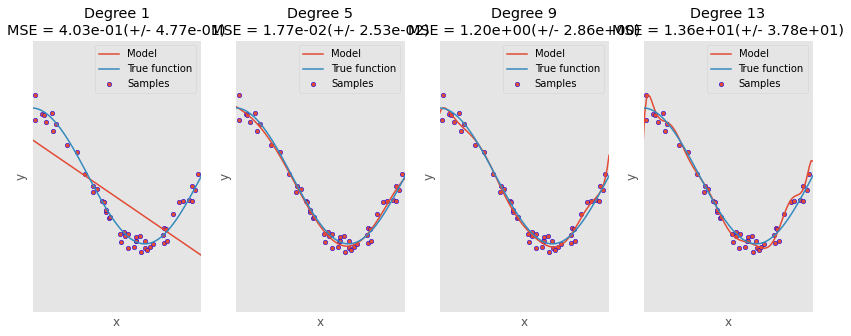

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 50
degrees = range(1,15,4)

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolyRegression(degrees[i], stat_type = True,include_bias=True)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()


Красивый overfit)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

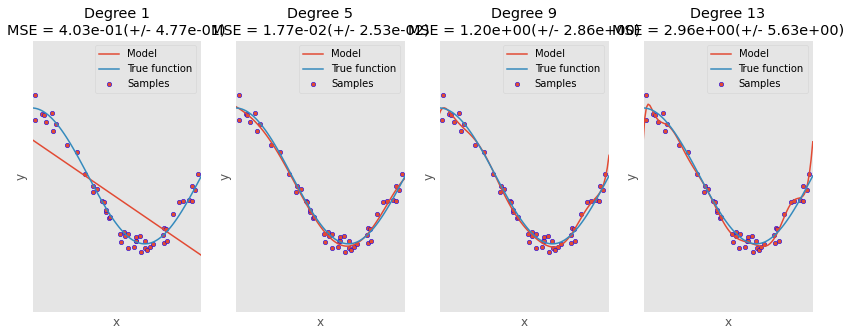

In [ ]:
# из библиотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 50
degrees = range(1,15,4)

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Задание 3.4

In [ ]:
### оставьте в наборе данных только 7 наиболее значимых признаков
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(boston_dataset.data, boston_dataset.target, shuffle = False)
print(f"X train: {X_train.shape}, X_test: {X_test.shape}")

X train: (379, 13), X_test: (127, 13)


In [ ]:
model = PolyRegression(1,include_bias=False)
model.fit(X_train,np.expand_dims(y_train,axis = 1))
pr = model.predict(X_test)

print(f" MSE: {metric(pr,y_test, name = 'MSE')}")
print(f" MAE: {metric(pr,y_test, name = 'MAE')}")

 MSE: 65.65458664168878
 MAE: 7.057373899365514


In [ ]:
assert boston.columns.shape == model.coef_.reshape(-1).shape

<BarContainer object of 13 artists>

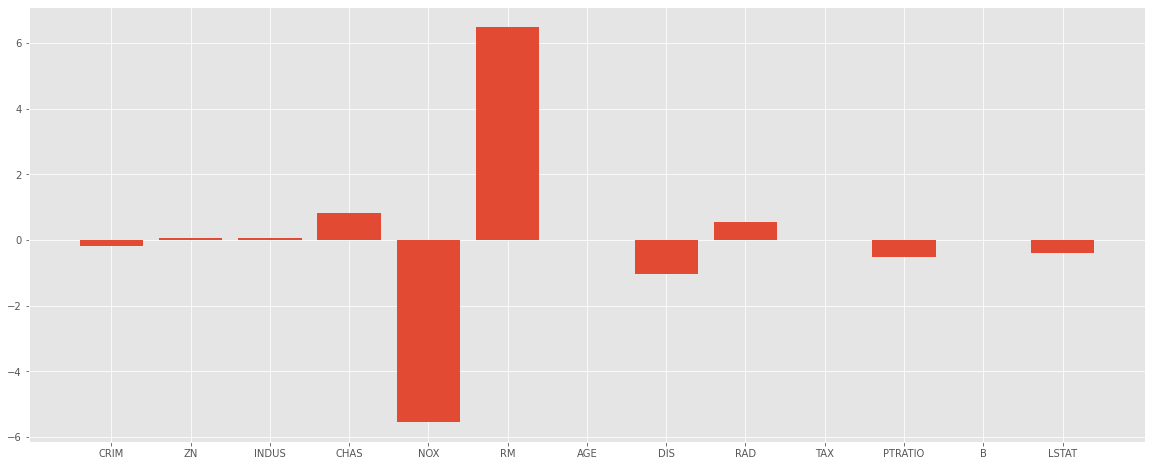

In [ ]:
plt.figure(figsize=(20, 8))
plt.bar(boston.columns, model.coef_.reshape(-1))

In [ ]:
name_coef = []
for name, coef in zip(boston.columns, model.coef_.reshape(-1)):
  name_coef.append((abs(coef),name))
name_coef.sort()
print(name_coef)

[(0.006907831423651685, 'AGE'), (0.012398730208676231, 'TAX'), (0.013045715443236697, 'B'), (0.04635302171218648, 'ZN'), (0.05662321293217563, 'INDUS'), (0.18283128357219747, 'CRIM'), (0.3949025702397455, 'LSTAT'), (0.5243335196781777, 'PTRATIO'), (0.5414193532561995, 'RAD'), (0.8142684019248891, 'CHAS'), (1.0310973584344811, 'DIS'), (5.544157581569063, 'NOX'), (6.49222225212123, 'RM')]


In [ ]:
imp_cols = name_coef[:len(name_coef) - 7]
names = [name for _, name in imp_cols]

boston = boston.drop(columns=names)
boston

,CHAS,NOX,RM,DIS,RAD,PTRATIO,LSTAT
0,0.0,0.538,6.575,4.0900,1.0,15.3,4.98
1,0.0,0.469,6.421,4.9671,2.0,17.8,9.14
2,0.0,0.469,7.185,4.9671,2.0,17.8,4.03
3,0.0,0.458,6.998,6.0622,3.0,18.7,2.94
4,0.0,0.458,7.147,6.0622,3.0,18.7,5.33
...,...,...,...,...,...,...,...
501,0.0,0.573,6.593,2.4786,1.0,21.0,9.67
502,0.0,0.573,6.120,2.2875,1.0,21.0,9.08
503,0.0,0.573,6.976,2.1675,1.0,21.0,5.64
504,0.0,0.573,6.794,2.3889,1.0,21.0,6.48


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(boston.to_numpy(), boston_dataset.target)

model = PolyRegression(1,include_bias=False)
model.fit(X_train,np.expand_dims(y_train,axis = 1))

pr = model.predict(X_test)
print(f" MSE: {metric(pr,y_test, name = 'MSE')}")
print(f" MAE: {metric(pr,y_test, name = 'MAE')}")

 MSE: 24.2394738141736
 MAE: 3.470885101011588
